IMPORTING THE DATASET

In [1]:
import pandas as pd
df=pd.read_csv('avocado.csv')
print (df)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [2]:
df.shape

(18249, 14)

18249 rows and 14 columns

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


CHECKING NULL VALUES

In [4]:
import numpy as np
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

no null values in the dataset

DROPPING COLUMNS

Unammed is index and data has no contribution in the target variable so dropping both

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.drop('Date',axis=1,inplace=True)

In [8]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


ENCODING CATEGORICAL COLUMNS

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["region"]=LE.fit_transform(df["region"])

In [10]:
df["region"].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["type"]=LE.fit_transform(df["type"])

In [12]:
df["type"].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [13]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


CHECKING CORRELATION VALUES

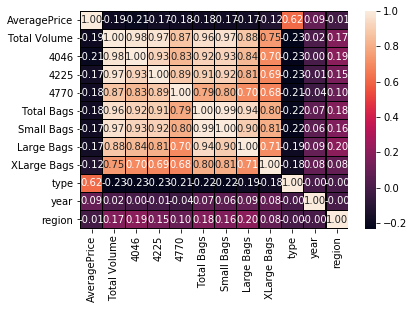

In [14]:
import matplotlib as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

unable to observe correlation value clearly from heatmap

In [15]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


from the table we can observe that total volume,total bags,small bags,large bags,xlarge bags has strong correlation with target variable

CHECKING SKEWNESS

In [17]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Dataset is skewd so skewness has to be removed

SPLITING INTO X AND Y 

In [19]:
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [20]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [21]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [22]:
df_new.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
dtype: float64

skewness removed from the dataframe

CHECKING FOR OUTLIERS

AttributeError: module 'matplotlib' has no attribute 'subplot_adjust'

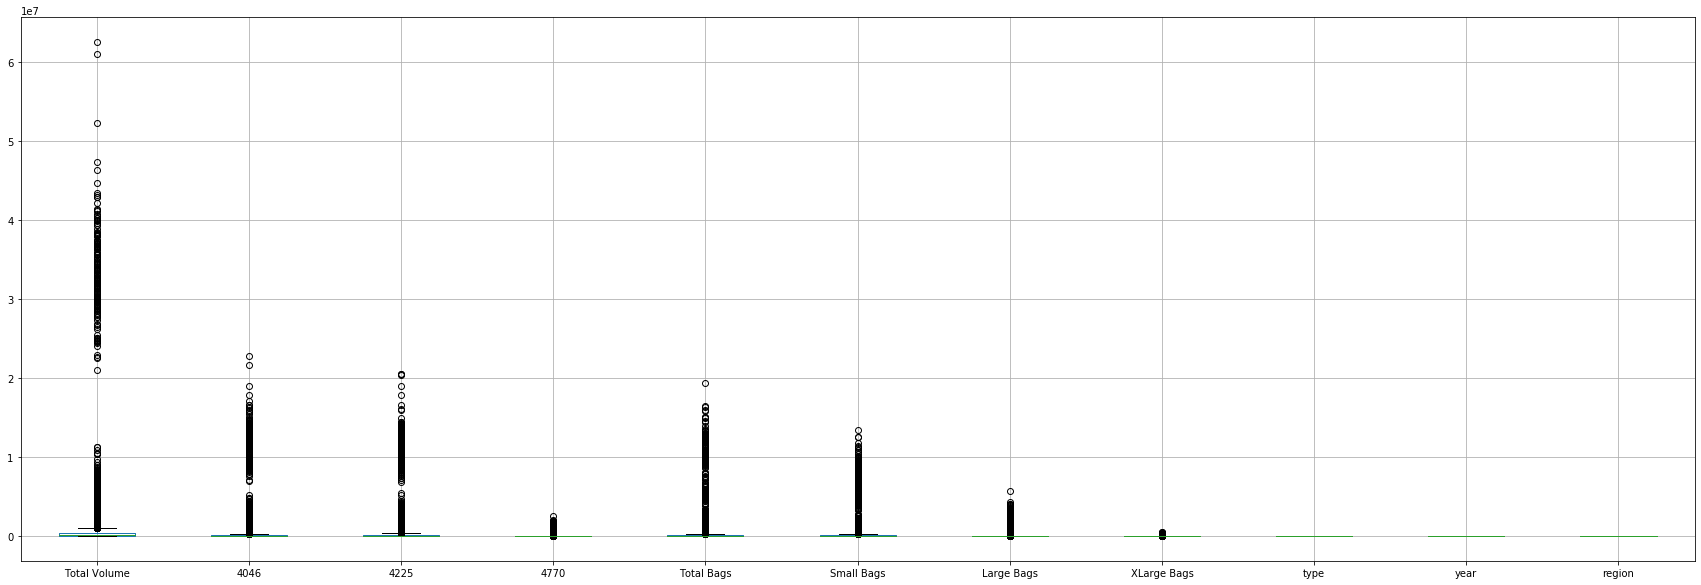

In [23]:
import seaborn as sns
import matplotlib as plt
x.boxplot(figsize=[30,10])
plt.subplot_adjust(bottom=0.25)
plt.show()

outliers has to be removed

In [24]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df_new))
z

array([[0.08660524, 0.65861896, 0.30731294, ..., 0.99983562, 1.22187884,
        2.01155231],
       [0.15574567, 0.77686953, 0.23164739, ..., 0.99983562, 1.22187884,
        2.01155231],
       [0.17932662, 0.73194656, 0.57950332, ..., 0.99983562, 1.22187884,
        2.01155231],
       ...,
       [0.77150535, 0.61983119, 0.77249619, ..., 1.00016441, 1.96856389,
        1.54383806],
       [0.69807719, 0.55028196, 0.71054316, ..., 1.00016441, 1.96856389,
        1.54383806],
       [0.66380937, 0.36790819, 0.78517306, ..., 1.00016441, 1.96856389,
        1.54383806]])

In [25]:
threshold=3
print(np.where(z>3))

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11321,
       11322, 11325, 11326, 11332, 11333, 11336, 11338, 11340, 11342,
       11347, 11348, 11349, 11350, 11354, 11387, 11388, 11594, 11595,
       11596, 11597, 11614, 11662, 12132, 14404], dtype=int64), array([2, 5, 5, 5, 5, 5, 

In [26]:
df_z=df_new[(z<3).all(axis=1)]

In [27]:
df_z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,-2.011552
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,-2.011552
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,1.543838
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,1.543838
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,1.543838
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,1.543838


In [28]:
data_loss=((18249-18151)/18249)*100

In [29]:
data_loss

0.5370157268891446

SCALING THE DATA

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled = mms.fit_transform(df_z)
print(scaled)

[[0.46859775 0.33776601 0.53536794 ... 0.         0.         0.        ]
 [0.45485341 0.31406149 0.5220091  ... 0.         0.         0.        ]
 [0.52146203 0.32306675 0.58342344 ... 0.         0.         0.        ]
 ...
 [0.33244727 0.34554141 0.34472648 ... 1.         1.         1.        ]
 [0.34704397 0.35948326 0.35566436 ... 1.         1.         1.        ]
 [0.35385603 0.39604193 0.34248837 ... 1.         1.         1.        ]]


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

for i in range(0,100):
    x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i} the training accuracy is:-{r2_score (y_train,pred_train)}")
    print(f"at random state {i} the testing accuracy is:-{r2_score (y_test,pred_test)}")
    print("\n")

at random state 0 the training accuracy is:-0.41073002849231954
at random state 0 the testing accuracy is:-0.3975705587683608


at random state 1 the training accuracy is:-0.410337009212149
at random state 1 the testing accuracy is:-0.3989515304254482


at random state 2 the training accuracy is:-0.4096347611223341
at random state 2 the testing accuracy is:-0.40030567445243115


at random state 3 the training accuracy is:-0.4054743740412472
at random state 3 the testing accuracy is:-0.4090530356472274


at random state 4 the training accuracy is:-0.41294783356815434
at random state 4 the testing accuracy is:-0.39293225771974083


at random state 5 the training accuracy is:-0.40244383621768753
at random state 5 the testing accuracy is:-0.41462403159469696


at random state 6 the training accuracy is:-0.3947828608609377
at random state 6 the testing accuracy is:-0.42987364755646085


at random state 7 the training accuracy is:-0.4097902967700797
at random state 7 the testing accuracy is:

In [35]:
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=26)

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
pred_test=lr.predict(x_test)

In [38]:
print(r2_score (y_test,pred_test))

0.4067188448778454


REGURALIZATION :

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':(range(0,10))}
ls= Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.1856755275295, tolerance: 0.159027852698364
  positive)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.8739332006854, tolerance: 0.15779877515386975
  positive)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467.25175581764483, tolerance: 0.15826076992945506
  positive)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

{'alpha': 0.0001, 'random_state': 0}


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589.6856998144049, tolerance: 0.19801720107639462
  positive)


In [63]:

ls = Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
lss = r2_score(y_test,pred_ls)
lss

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589.6856998144049, tolerance: 0.19801720107639462
  positive)


0.4119684751666731

ENSEMBLING:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf = RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)
rfs = r2_score(y_test,pred_rf)
print('R2 Score:', rfs*100)
rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 84.50645464746174
Cross Val Score: 31.537375801750212


We are getting the model accuracy and cross validation 84% and 31% 